# Importing libraries and dataset

In [117]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [118]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Basic data exploration
The y_train and y_test sginify what type of clothing is on the images in X_train and X_test, numbers in those columns represent:
0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

In [119]:
print(X_train.shape)

(60000, 28, 28)


In [120]:
print(y_train.shape)

(60000,)


In [121]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [122]:
print(y_train[0])

9


<Axes: >

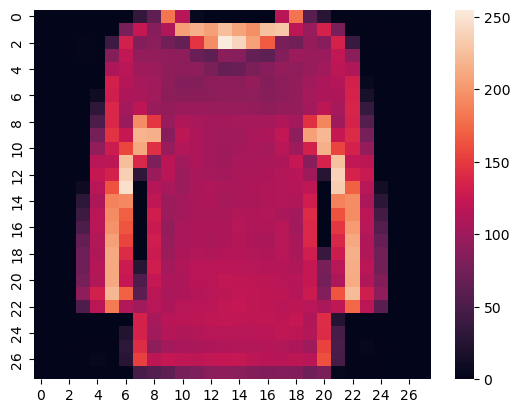

In [123]:
sns.heatmap(X_train[6321])

# Data preparation

Normalization of data

In [124]:
X_test = X_test/255
X_train = X_train/255

In [125]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

<Axes: >

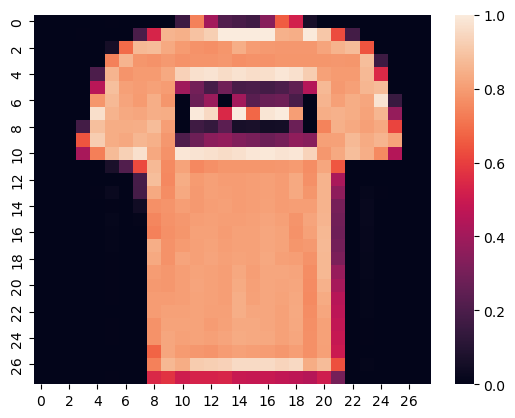

In [126]:
sns.heatmap(X_train[1])

Now we flatten the image, so that in can be inputed to neural network

In [127]:
X_train.shape

(60000, 28, 28)

In [128]:
X_test.shape

(10000, 28, 28)

In [129]:
X_train_flat = X_train.reshape(60000,784)
X_test_flat = X_test.reshape(10000,784)

Now we need to one code the label

In [130]:
y_train = pd.get_dummies(y_train)
y_train.columns = ["T-shirt/top","Trouser","Pullover", "Dress", "Coat","Sandal","Shirt","Sneaker","Bag" ,"Ankle_boot"]
y_train.head()

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle_boot
0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [131]:
y_test = pd.get_dummies(y_test)
y_test.columns = ["T-shirt/top","Trouser","Pullover", "Dress", "Coat","Sandal","Shirt","Sneaker","Bag" ,"Ankle_boot"]
y_test.head()

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle_boot
0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0


# Basic neural networks

In [132]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout,InputLayer, BatchNormalization,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix

First model, rectified linear unit as activation function, one dropout layer

In [133]:
model1 = Sequential()
model1.add(InputLayer(784))

model1.add(Dense(128,activation = "relu"))
model1.add(BatchNormalization())

model1.add(Dense(128,activation = "relu"))
model1.add(BatchNormalization())

model1.add(Dense(128,activation = "relu"))
model1.add(BatchNormalization())
model1.add(Dropout(0.3))

model1.add(Dense(units=10, activation='softmax'))
model1.compile(loss= "CategoricalCrossentropy",optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])

In [134]:
model1.fit(X_train_flat, y_train, batch_size=128, epochs=15, verbose=1,validation_data=(X_train_flat, y_train))

Epoch 1/15
469/469 [==============================] - 5s 9ms/step - loss: 0.5320 - accuracy: 0.8159 - val_loss: 0.3813 - val_accuracy: 0.8565
Epoch 2/15
469/469 [==============================] - 4s 8ms/step - loss: 0.3820 - accuracy: 0.8621 - val_loss: 0.3931 - val_accuracy: 0.8573
Epoch 3/15
469/469 [==============================] - 4s 8ms/step - loss: 0.3435 - accuracy: 0.8753 - val_loss: 0.3903 - val_accuracy: 0.8523
Epoch 4/15
469/469 [==============================] - 4s 9ms/step - loss: 0.3199 - accuracy: 0.8826 - val_loss: 0.3183 - val_accuracy: 0.8812
Epoch 5/15
469/469 [==============================] - 4s 9ms/step - loss: 0.3038 - accuracy: 0.8874 - val_loss: 0.2792 - val_accuracy: 0.8936
Epoch 6/15
469/469 [==============================] - 4s 9ms/step - loss: 0.2881 - accuracy: 0.8931 - val_loss: 0.2660 - val_accuracy: 0.9007
Epoch 7/15
469/469 [==============================] - 4s 10ms/step - loss: 0.2769 - accuracy: 0.8982 - val_loss: 0.2835 - val_accuracy: 0.8935
Epoch

In [135]:
model1.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 128)               100480    
_________________________________________________________________
batch_normalization_39 (Batc (None, 128)               512       
_________________________________________________________________
dense_64 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_40 (Batc (None, 128)               512       
_________________________________________________________________
dense_65 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_41 (Batc (None, 128)               512       
_________________________________________________________________
dropout_47 (Dropout)         (None, 128)             

Making predictions, and converting to categorical values from propability

In [136]:
predictions = model1.predict(X_test_flat)
predictions[predictions>=0.5] = 1
predictions[predictions<0.5] = 0

In [137]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       924
           1       0.97      0.99      0.98       988
           2       0.83      0.77      0.80      1081
           3       0.83      0.91      0.87       920
           4       0.79      0.81      0.80       970
           5       0.97      0.97      0.97      1000
           6       0.65      0.76      0.70       848
           7       0.97      0.91      0.94      1062
           8       0.95      0.97      0.96       983
           9       0.93      0.97      0.95       956

   micro avg       0.87      0.89      0.88      9732
   macro avg       0.87      0.89      0.88      9732
weighted avg       0.87      0.89      0.88      9732
 samples avg       0.87      0.87      0.87      9732



D:\Anaconda\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Secound model tanh as activation function, one dropout layer

In [138]:
model2 = Sequential()
model2.add(InputLayer(784))

model2.add(Dense(128,activation = "tanh"))
model2.add(BatchNormalization())

model2.add(Dense(128,activation = "tanh"))
model2.add(BatchNormalization())

model2.add(Dense(128,activation = "tanh"))
model2.add(BatchNormalization())
model2.add(Dropout(0.3))

model2.add(Dense(units=10, activation='softmax'))
model2.compile(loss= "CategoricalCrossentropy",optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])

In [139]:
model2.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 128)               100480    
_________________________________________________________________
batch_normalization_42 (Batc (None, 128)               512       
_________________________________________________________________
dense_68 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_43 (Batc (None, 128)               512       
_________________________________________________________________
dense_69 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_44 (Batc (None, 128)               512       
_________________________________________________________________
dropout_48 (Dropout)         (None, 128)             

In [140]:
model2.fit(X_train_flat, y_train, batch_size=128, epochs=15, verbose=1,validation_data=(X_train_flat, y_train))

Epoch 1/15
469/469 [==============================] - 5s 9ms/step - loss: 0.5361 - accuracy: 0.8144 - val_loss: 0.3758 - val_accuracy: 0.8627
Epoch 2/15
469/469 [==============================] - 4s 9ms/step - loss: 0.3884 - accuracy: 0.8606 - val_loss: 0.3449 - val_accuracy: 0.8713
Epoch 3/15
469/469 [==============================] - 4s 8ms/step - loss: 0.3409 - accuracy: 0.8755 - val_loss: 0.2964 - val_accuracy: 0.8895
Epoch 4/15
469/469 [==============================] - 4s 9ms/step - loss: 0.3129 - accuracy: 0.8855 - val_loss: 0.3275 - val_accuracy: 0.8766
Epoch 5/15
469/469 [==============================] - 5s 10ms/step - loss: 0.2929 - accuracy: 0.8921 - val_loss: 0.2684 - val_accuracy: 0.8980
Epoch 6/15
469/469 [==============================] - 4s 9ms/step - loss: 0.2792 - accuracy: 0.8967 - val_loss: 0.2837 - val_accuracy: 0.8890
Epoch 7/15
469/469 [==============================] - 4s 8ms/step - loss: 0.2648 - accuracy: 0.9018 - val_loss: 0.2487 - val_accuracy: 0.9078
Epoch

In [141]:
predictions = model1.predict(X_test_flat)
predictions[predictions>=0.5] = 1
predictions[predictions<0.5] = 0

In [142]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       924
           1       0.97      0.99      0.98       988
           2       0.83      0.77      0.80      1081
           3       0.83      0.91      0.87       920
           4       0.79      0.81      0.80       970
           5       0.97      0.97      0.97      1000
           6       0.65      0.76      0.70       848
           7       0.97      0.91      0.94      1062
           8       0.95      0.97      0.96       983
           9       0.93      0.97      0.95       956

   micro avg       0.87      0.89      0.88      9732
   macro avg       0.87      0.89      0.88      9732
weighted avg       0.87      0.89      0.88      9732
 samples avg       0.87      0.87      0.87      9732



D:\Anaconda\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Convolutional Neural Network

In [143]:
from tensorflow.keras.callbacks import TensorBoard

In [144]:
arch = 'CNN_1'
tb = TensorBoard(log_dir='logs/' + arch)

Reshaping data to fit CNN

In [145]:
X_test.shape

(10000, 28, 28)

In [146]:
X_train.shape

(60000, 28, 28)

In [147]:
X_train = X_train.reshape(60000, 28, 28,1)
X_test = X_test.reshape(10000, 28, 28,1)

In [148]:
X_train[0].shape

(28, 28, 1)

First CNN with 3 convolutional layers, increasing the number of filters, with padding, becouse data does touch the edges 

In [149]:

model3 = Sequential()

model3.add(InputLayer((28,28,1)))

model3.add(Conv2D(64, (3, 3),strides=(2,2),activation = "relu",padding="same"))

model3.add(Conv2D(128, (3, 3),strides=(2,2),activation = "relu",padding="same"))

model3.add(Conv2D(256, (3, 3),strides=(2,2),activation = "relu",padding="same"))
model3.add(MaxPooling2D(pool_size=(3, 3)))


model3.add(Flatten()) 

model3.add(Dense(128,activation = "relu"))
model3.add(BatchNormalization())
model3.add(Dropout(0.3))

model3.add(Dense(units=10, activation='softmax'))
model3.compile(loss= "CategoricalCrossentropy",optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])

In [150]:
model3.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 14, 14, 64)        640       
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 4, 4, 256)         295168    
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 1, 1, 256)         0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 256)               0         
_________________________________________________________________
dense_71 (Dense)             (None, 128)               32896     
_________________________________________________________________
batch_normalization_45 (Batc (None, 128)             

In [151]:
model3.fit(X_train, y_train, batch_size=128, epochs=15, verbose=1,validation_data=(X_test, y_test))

Epoch 1/15
469/469 [==============================] - 5s 9ms/step - loss: 0.4697 - accuracy: 0.8343 - val_loss: 0.4710 - val_accuracy: 0.8170
Epoch 2/15
469/469 [==============================] - 4s 8ms/step - loss: 0.3143 - accuracy: 0.8875 - val_loss: 0.3471 - val_accuracy: 0.8785
Epoch 3/15
469/469 [==============================] - 4s 8ms/step - loss: 0.2602 - accuracy: 0.9067 - val_loss: 0.3143 - val_accuracy: 0.8876
Epoch 4/15
469/469 [==============================] - 4s 9ms/step - loss: 0.2277 - accuracy: 0.9176 - val_loss: 0.2833 - val_accuracy: 0.9007
Epoch 5/15
469/469 [==============================] - 4s 9ms/step - loss: 0.1976 - accuracy: 0.9287 - val_loss: 0.3305 - val_accuracy: 0.8901
Epoch 6/15
469/469 [==============================] - 4s 9ms/step - loss: 0.1742 - accuracy: 0.9367 - val_loss: 0.3422 - val_accuracy: 0.8838
Epoch 7/15
469/469 [==============================] - 4s 9ms/step - loss: 0.1511 - accuracy: 0.9452 - val_loss: 0.3070 - val_accuracy: 0.9040
Epoch 

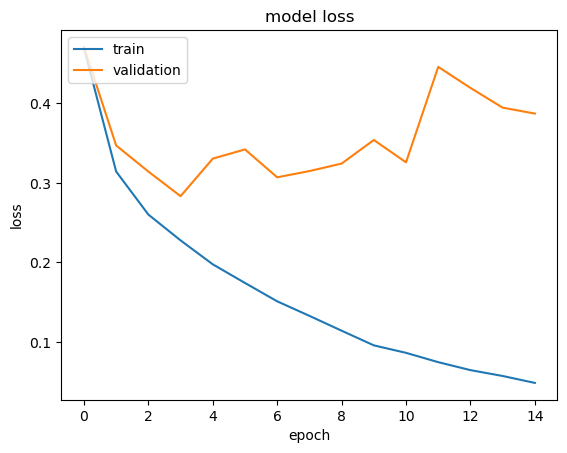

In [152]:
plt.plot(model3.history.history['loss'])
plt.plot(model3.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

Since the model is overtraning I'll add dropout to convolutional layers

In [153]:
model4 = Sequential()

model4.add(InputLayer((28,28,1)))

model4.add(Conv2D(64, (3, 3),strides=(2,2),activation = "relu",padding="same"))

model4.add(Conv2D(128, (3, 3),strides=(2,2),activation = "relu",padding="same"))
model4.add(Dropout(0.4))

model4.add(Conv2D(256, (3, 3),strides=(2,2),activation = "relu",padding="same"))
model4.add(Dropout(0.4))
model4.add(MaxPooling2D(pool_size=(3, 3)))


model4.add(Flatten()) 

model4.add(Dense(128,activation = "relu"))
model4.add(BatchNormalization())
model4.add(Dropout(0.4))

model4.add(Dense(units=10, activation='softmax'))
model4.compile(loss= "CategoricalCrossentropy",optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])

In [154]:
model4.fit(X_train, y_train, batch_size=128, epochs=15, verbose=1,validation_data=(X_test, y_test),callbacks=[tb])

Epoch 1/15
469/469 [==============================] - 9s 19ms/step - loss: 0.6494 - accuracy: 0.7688 - val_loss: 0.6109 - val_accuracy: 0.8103
Epoch 2/15
469/469 [==============================] - 4s 9ms/step - loss: 0.4289 - accuracy: 0.8466 - val_loss: 0.4129 - val_accuracy: 0.8531
Epoch 3/15
469/469 [==============================] - 4s 9ms/step - loss: 0.3722 - accuracy: 0.8664 - val_loss: 0.3509 - val_accuracy: 0.8688
Epoch 4/15
469/469 [==============================] - 4s 9ms/step - loss: 0.3445 - accuracy: 0.8760 - val_loss: 0.3336 - val_accuracy: 0.8787
Epoch 5/15
469/469 [==============================] - 4s 9ms/step - loss: 0.3207 - accuracy: 0.8842 - val_loss: 0.2941 - val_accuracy: 0.8934
Epoch 6/15
469/469 [==============================] - 4s 9ms/step - loss: 0.3057 - accuracy: 0.8896 - val_loss: 0.2962 - val_accuracy: 0.8886
Epoch 7/15
469/469 [==============================] - 4s 9ms/step - loss: 0.2906 - accuracy: 0.8947 - val_loss: 0.2808 - val_accuracy: 0.8971
Epoch

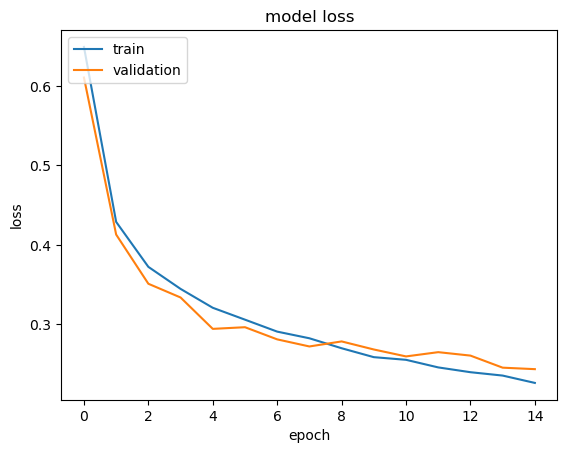

In [155]:
plt.plot(model4.history.history['loss'])
plt.plot(model4.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

Second CNN with 3 convolutional and 2 deep layers 

In [156]:
arch = 'CNN_2'
tb = TensorBoard(log_dir='logs/' + arch)

In [157]:
model5 = Sequential()

model5.add(InputLayer((28,28,1)))

model5.add(Conv2D(64, (3, 3),strides=(2,2),activation = "relu",padding="same"))

model5.add(Conv2D(128, (3, 3),strides=(2,2),activation = "relu",padding="same"))
model5.add(Dropout(0.4))

model5.add(Conv2D(256, (3, 3),strides=(2,2),activation = "relu",padding="same"))
model5.add(Dropout(0.4))
model5.add(MaxPooling2D(pool_size=(3, 3)))


model5.add(Flatten()) 

model5.add(Dense(128,activation = "relu"))
model5.add(BatchNormalization())
model5.add(Dropout(0.4))


model5.add(Dense(128,activation = "relu"))
model5.add(BatchNormalization())
model5.add(Dropout(0.4))

model5.add(Dense(units=10, activation='softmax'))
model5.compile(loss= "CategoricalCrossentropy",optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])

In [158]:
model5.fit(X_train, y_train, batch_size=128, epochs=15, verbose=1,validation_data=(X_test, y_test),callbacks=[tb])

Epoch 1/15
469/469 [==============================] - 7s 13ms/step - loss: 0.8655 - accuracy: 0.6953 - val_loss: 0.6227 - val_accuracy: 0.7858
Epoch 2/15
469/469 [==============================] - 5s 11ms/step - loss: 0.5018 - accuracy: 0.8208 - val_loss: 0.3995 - val_accuracy: 0.8574
Epoch 3/15
469/469 [==============================] - 5s 10ms/step - loss: 0.4319 - accuracy: 0.8475 - val_loss: 0.3615 - val_accuracy: 0.8693
Epoch 4/15
469/469 [==============================] - 5s 11ms/step - loss: 0.3883 - accuracy: 0.8620 - val_loss: 0.3497 - val_accuracy: 0.8675
Epoch 5/15
469/469 [==============================] - 5s 10ms/step - loss: 0.3599 - accuracy: 0.8739 - val_loss: 0.3215 - val_accuracy: 0.8821
Epoch 6/15
469/469 [==============================] - 5s 10ms/step - loss: 0.3387 - accuracy: 0.8801 - val_loss: 0.3128 - val_accuracy: 0.8790
Epoch 7/15
469/469 [==============================] - 5s 11ms/step - loss: 0.3242 - accuracy: 0.8853 - val_loss: 0.2918 - val_accuracy: 0.8914

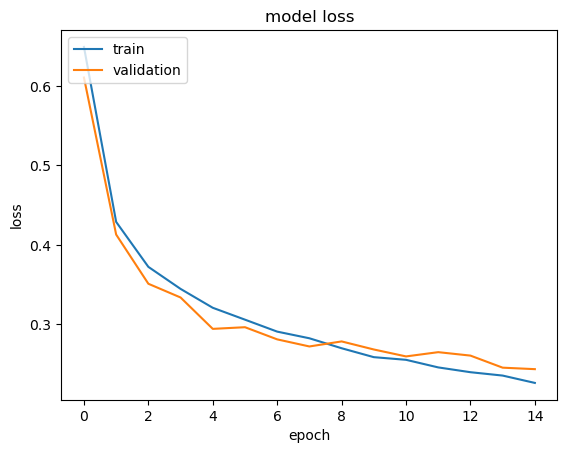

In [159]:
plt.plot(model4.history.history['loss'])
plt.plot(model4.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

Third CNN with 4 convolutional and 1 deep layer 

In [160]:
arch = 'CNN_3'
tb = TensorBoard(log_dir='logs/' + arch)

In [161]:
model6 = Sequential()

model6.add(InputLayer((28,28,1)))

model6.add(Conv2D(32, (3, 3),strides=(2,2),activation = "relu",padding="same"))

model6.add(Conv2D(64, (3, 3),strides=(2,2),activation = "relu",padding="same"))

model6.add(Conv2D(128, (3, 3),strides=(2,2),activation = "relu",padding="same"))
model6.add(Dropout(0.4))

model6.add(Conv2D(256, (3, 3),strides=(2,2),activation = "relu",padding="same"))
model6.add(Dropout(0.4))
model6.add(MaxPooling2D(pool_size=(2, 2)))


model6.add(Flatten()) 

model6.add(Dense(128,activation = "relu"))
model6.add(BatchNormalization())
model6.add(Dropout(0.4))

model6.add(Dense(units=10, activation='softmax'))
model6.compile(loss= "CategoricalCrossentropy",optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])

In [162]:
model6.fit(X_train, y_train, batch_size=128, epochs=15, verbose=1,validation_data=(X_test, y_test),callbacks=[tb])

Epoch 1/15
469/469 [==============================] - 7s 12ms/step - loss: 0.6119 - accuracy: 0.7795 - val_loss: 0.5267 - val_accuracy: 0.8488
Epoch 2/15
469/469 [==============================] - 4s 8ms/step - loss: 0.3967 - accuracy: 0.8575 - val_loss: 0.3478 - val_accuracy: 0.8703
Epoch 3/15
469/469 [==============================] - 4s 8ms/step - loss: 0.3362 - accuracy: 0.8779 - val_loss: 0.3200 - val_accuracy: 0.8798
Epoch 4/15
469/469 [==============================] - 4s 8ms/step - loss: 0.3051 - accuracy: 0.8892 - val_loss: 0.2872 - val_accuracy: 0.8936
Epoch 5/15
469/469 [==============================] - 4s 8ms/step - loss: 0.2818 - accuracy: 0.8977 - val_loss: 0.2746 - val_accuracy: 0.8989
Epoch 6/15
469/469 [==============================] - 4s 8ms/step - loss: 0.2622 - accuracy: 0.9045 - val_loss: 0.2681 - val_accuracy: 0.9002
Epoch 7/15
469/469 [==============================] - 4s 9ms/step - loss: 0.2491 - accuracy: 0.9094 - val_loss: 0.2533 - val_accuracy: 0.9072
Epoch

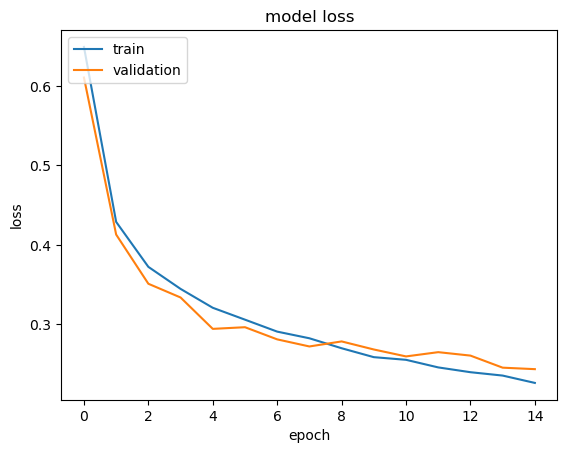

In [163]:
plt.plot(model4.history.history['loss'])
plt.plot(model4.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [164]:
%load_ext tensorboard
%tensorboard --logdir logs